In [2]:
jupyter notebook \
  --NotebookApp.allow_origin='https://colab.research.google.com' \
  --port=8888 \
  --NotebookApp.port_retries=0

SyntaxError: invalid syntax (<ipython-input-2-566a839aae0b>, line 1)

In [3]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error


plt.style.use('seaborn-darkgrid')

Using TensorFlow backend.


In [2]:
# mudar essa variavel conforme o tanto de dias a frente que quer a previsão
futuro = 36

In [26]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
#url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
df = pd.read_csv(url)

In [27]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,174,237,273,281,299,349,367,423,444,484
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,243,259,277,304,333,361,377,383,400,409
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,716,847,986,1171,1251,1320,1423,1468,1572,1666
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,376,390,428,439,466,501,525,545,564,583
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,7,8,8,8,10,14,16,17,19,19


In [28]:
df = df.loc[df['Country/Region'] == 'Brazil'].copy() # queremos previsões apenas para o Brazil

In [6]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
28,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,201,240,324,359,445,486,564,686,819,950


In [81]:
df.drop('Province/State', axis = 1, inplace = True)
df.drop('Lat', axis = 1, inplace = True)
df.drop('Long', axis = 1, inplace = True)
df.drop('Country/Region', axis = 1, inplace = True)

In [29]:
df = df.iloc[:,36:]

In [8]:
index = list(df.columns.values) 
casos = []
for i in index:
    confirmados = df[i].sum()
    casos.append(confirmados)

In [9]:
dias = np.array([i for i in range(len(index))]).reshape(-1, 1)

In [10]:
dias

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46]])

In [11]:
dias_futuro = np.array([i for i in range(len(index) + futuro)]).reshape(-1, 1)

In [12]:
start = '2/27/20'
start_date = datetime.datetime.strptime(start,"%m/%d/%y")
datas_futuras = []
for i in range(len(dias_futuro)):
    datas_futuras.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%y'))

In [13]:
datas_futuras

['02/27/20',
 '02/28/20',
 '02/29/20',
 '03/01/20',
 '03/02/20',
 '03/03/20',
 '03/04/20',
 '03/05/20',
 '03/06/20',
 '03/07/20',
 '03/08/20',
 '03/09/20',
 '03/10/20',
 '03/11/20',
 '03/12/20',
 '03/13/20',
 '03/14/20',
 '03/15/20',
 '03/16/20',
 '03/17/20',
 '03/18/20',
 '03/19/20',
 '03/20/20',
 '03/21/20',
 '03/22/20',
 '03/23/20',
 '03/24/20',
 '03/25/20',
 '03/26/20',
 '03/27/20',
 '03/28/20',
 '03/29/20',
 '03/30/20',
 '03/31/20',
 '04/01/20',
 '04/02/20',
 '04/03/20',
 '04/04/20',
 '04/05/20',
 '04/06/20',
 '04/07/20',
 '04/08/20',
 '04/09/20',
 '04/10/20',
 '04/11/20',
 '04/12/20',
 '04/13/20',
 '04/14/20',
 '04/15/20',
 '04/16/20',
 '04/17/20',
 '04/18/20',
 '04/19/20',
 '04/20/20',
 '04/21/20',
 '04/22/20',
 '04/23/20',
 '04/24/20',
 '04/25/20',
 '04/26/20',
 '04/27/20',
 '04/28/20',
 '04/29/20',
 '04/30/20',
 '05/01/20',
 '05/02/20',
 '05/03/20',
 '05/04/20',
 '05/05/20',
 '05/06/20',
 '05/07/20',
 '05/08/20',
 '05/09/20',
 '05/10/20',
 '05/11/20',
 '05/12/20',
 '05/13/20',

In [30]:
df = df.T
df['dates'] = index
new_index = [x for x in range(len(index))]
df.head()

,28,dates
2/23/20,0,2/23/20
2/24/20,0,2/24/20
2/25/20,0,2/25/20
2/26/20,1,2/26/20
2/27/20,1,2/27/20


In [31]:
df['index'] = new_index
df = df.set_index('index')
df.rename(columns={28:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df.index.name = None
df['dates'] = dias

In [18]:
df.head()

,cases,dates
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [32]:
target = df['cases'].copy()
df.drop('cases', axis = 1, inplace = True)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.1, random_state=42)

In [35]:
#params = {'C':[1, 2, 3, 10], 'shrinking':[True, False], 'epsilon':[0.001, 0.01, 0.1, 1], 'max_iter': [-1]
         #,'gamma':['scale', 'auto', 0.01, 0.5, 0.1, 0.5, 1],'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 
          #'coef0':[0.0, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0]}
        
params = {'C': [2],
 'coef0': [3.5],
 'epsilon': [0.001],
 'gamma': [0.5],
 'kernel': ['poly'],
 'max_iter': [-1],
 'shrinking': [False]}
cv=[(slice(None), slice(None))]
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10 ,return_train_score=False, n_jobs=-1, verbose=1 )
svm.fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.1min remaining:   42.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [36]:
svm.score(X_test, y_test)

-158.68092397472688

In [37]:
svm_pred = svm.predict(dias_futuro)

In [38]:
svm_pred

array([-3.90483214e+02, -2.29366377e+02, -9.98074203e+01,  9.99248006e-01,
        7.58592186e+01,  1.27578082e+02,  1.58961430e+02,  1.72814853e+02,
        1.71943942e+02,  1.59154287e+02,  1.37251481e+02,  1.09041113e+02,
        7.73287746e+01,  4.49200571e+01,  1.46205511e+01, -1.07641524e+01,
       -2.84284624e+01, -3.55667881e+01, -2.93735385e+01, -7.04312263e+00,
        3.42300504e+01,  9.72515715e+01,  1.84827032e+02,  2.99762022e+02,
        4.44862133e+02,  6.22932956e+02,  8.36780082e+02,  1.08920910e+03,
        1.38302560e+03,  1.72103518e+03,  2.10604343e+03,  2.54085593e+03,
        3.02827829e+03,  3.57111608e+03,  4.17217490e+03,  4.83426034e+03,
        5.56017800e+03,  6.35273346e+03,  7.21473231e+03,  8.14898014e+03,
        9.15828256e+03,  1.02454451e+04,  1.14132735e+04,  1.26645732e+04,
        1.40021498e+04,  1.54288089e+04,  1.69473562e+04,  1.85605972e+04,
        2.02713375e+04,  2.20823827e+04,  2.39965384e+04,  2.60166101e+04,
        2.81454035e+04,  

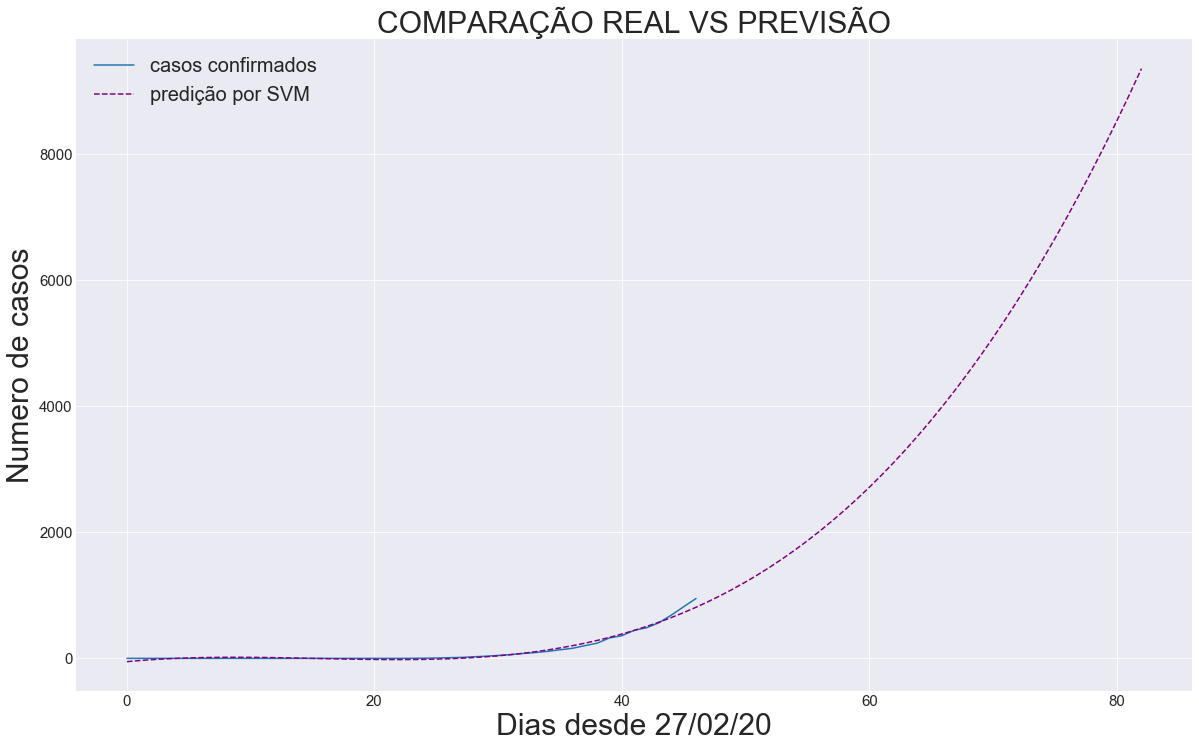

In [25]:
plt.figure(figsize=(20, 12))
plt.plot(dias, casos)
plt.plot(dias_futuro,svm_pred, linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO REAL VS PREVISÃO', size=30)
plt.xlabel('Dias desde 27/02/20', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['casos confirmados', 'predição por SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [24]:
svm.best_params_

{'C': 10,
 'epsilon': 0.001,
 'gamma': 'scale',
 'max_iter': -1,
 'shrinking': True}

In [21]:
np.arange(2,11,1)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])